# 고급정렬

## 다양한 정렬 알고리즘

### <간단한 정렬 알고리즘 특징 O(n^2)>
 - 선택정렬 : 입력의 크기에 따라 자료 이동 횟수 결정
 - 삽입정렬 : 레코드의 많은 이동이 필요, 대부분의 레코드가 이미 정렬되어있는 경우에는 효율적
 - 버블정렬 : 가장 간단한 알고리즘


### <효율적인 알고리즘들>
 - 셸 정렬 : 삽입 정렬 개념으로 개선한 방법
 - 힙 정렬 : 제자리 정렬로 구현하는 방법
 - 병합 정렬 : 연속적인 분할과 병합을 이용
 - 퀵 정렬, 이중피벗 퀵 정렬 : 피벗을 이용한 정렬
 - 기수, 카운팅 정렬 : 분배를 이용해 정렬, 킷값에 제한이 있음.

## 셸 정렬 - 최선 O(n) / 최악 O(n^2) / 평균 O(n^0.5)

- 삽입정렬은 어느정도 절렬된 리스트에서 대단히 빠르다.
- 그러나 요소들이 이웃한 위치로만 이동 -> 많은 이동 발생
- 요소들이 멀리 떨어진 위치로 이동할 수 있게 한다면
- -> 보다 적게 이동하여 제자리 찾을 수 있음

1. 리스트를 일정 간격(gap)의 부분 리스트로 나눔 , 나뉘어진 각각의 부분리스트를 삽입정렬함
2. 간격을 줄임 : 부분리스트의 수는 더 작아지고, 각 부분 리스트는 더 커짐
3. 간격이 1이 될때까지 이과정 반복

<장점>

- 불연속적인 부분 리스트에서 원거리 자료 이동으로 보다 적은 연산으로 제자리 찾을 가능성 증대
- 부분 리스트가 점진적으로 정렬된 상태가 되므로 삽입정렬 속도 증가

In [6]:
#파라미터 상태 확인할 것.!
def sortGapInsertion(A,first,last,gap):
    for i in range(first+gap,last+1,gap): #gap 간격으로 간격을 두고 정렬을 할때, 뒷부분을 이동시키면서 for문 작동
        key = A[i] #뒤 쪽 값
        print('i',i)
        j = i -gap #앞 쪽 값
        print('j',j)
        print('first',first)
        while j >= first and key < A[j]: #앞쪽 값 index(j)가 first보다 크면서, 뒤쪽 값보다 커서 자리를 바꿔줘야하는 경우 아래를 반복한다.
            A[j+gap] = A[j] #우선, 바꿔줘야하는 자리에 앞쪽 값을 넣어주고
            j = j-gap #j보다 gap 만큼 앞쪽 값이 있다면 다시 반복문 진행해서 정렬해준다. 없다면 반복문은 종료.
            print('---j:',j)
        A[j+gap] = key #그리고 앞에 값에 뒤쪽 값을 넣어줘서 자리를 바꿔주는 현상을 만든다.

In [7]:
def shell_sort(A):
    n= len(A)
    gap = n//2
    while gap > 0: #gap이 0이 된다면 종료

        if (gap %2) == 0: gap += 1 #짝수라면 1을 더해준다. 리스트 내에서 짝수의 위치는 절반을 나눠주지 못하기 때문.
        print(gap)
        for i in range(gap): #gap은 4->3->1로 진행된다. 밑에 gap//2로 인해.
            sortGapInsertion(A,i,n-1,gap) #A를 i는 앞 부분 index, n-1은 
        print('    Gap=',gap,A)
        gap = gap//2
        

In [8]:
p = [7,4,9,6,3,8,7,5]
shell_sort(p)

5
i 5
j 0
first 0
i 6
j 1
first 1
i 7
j 2
first 2
---j: -3
    Gap= 5 [7, 4, 5, 6, 3, 8, 7, 9]
3
i 3
j 0
first 0
---j: -3
i 6
j 3
first 0
i 4
j 1
first 1
---j: -2
i 7
j 4
first 1
i 5
j 2
first 2
    Gap= 3 [6, 3, 5, 7, 4, 8, 7, 9]
1
i 1
j 0
first 0
---j: -1
i 2
j 1
first 0
---j: 0
i 3
j 2
first 0
i 4
j 3
first 0
---j: 2
---j: 1
---j: 0
i 5
j 4
first 0
i 6
j 5
first 0
---j: 4
i 7
j 6
first 0
    Gap= 1 [3, 4, 5, 6, 7, 7, 8, 9]


In [42]:
A = [5,3,8,4,9,1,6,2,7]
shell_sort(A)

5
i 5
j 0
first 0
---j: -5
i 6
j 1
first 1
i 7
j 2
first 2
---j: -3
i 8
j 3
first 3
    Gap= 5 [1, 3, 2, 4, 9, 5, 6, 8, 7]
3
i 3
j 0
first 0
i 6
j 3
first 0
i 4
j 1
first 1
i 7
j 4
first 1
---j: 1
i 5
j 2
first 2
i 8
j 5
first 2
    Gap= 3 [1, 3, 2, 4, 8, 5, 6, 9, 7]
1
i 1
j 0
first 0
i 2
j 1
first 0
---j: 0
i 3
j 2
first 0
i 4
j 3
first 0
i 5
j 4
first 0
---j: 3
i 6
j 5
first 0
---j: 4
i 7
j 6
first 0
i 8
j 7
first 0
---j: 6
---j: 5
    Gap= 1 [1, 2, 3, 4, 5, 6, 7, 8, 9]


## 힙 정렬 - O(nlogn)
힙 클래스를 이용한 정렬

추가적인 메모리를 필요로 함.

1. 리스트를 최대힙으로 만듦
2. 최대힙을 정렬된 리스트로 만듦

In [21]:
def heapify(arr,n,i):
    largest = i #변경해야하는 기준점
    l = 2*i+1 #왼쪽 자식 노드 (배열 0자리를 사용해서 +1을 더 해줌.)
    r = 2*i+2 #오른쪽 자식 노드
    if l <n and arr[i] <arr[l]: largest = l #배열속에서(l<n) 부모노드가 왼쪽 자식 노드보다 작으면 위치를 왼쪽 노드로 변환
    if r <n and arr[largest] < arr[r]: largest = r#배열 속에서 부모노드가 오른쪽 자식 노드보다 작으면 위치를 오른쪽 자식노드로 변환
    if largest != i: #만약 위 두 if문으로 largest의 변화가 생겼다면
        arr[i],arr[largest] = arr[largest],arr[i] #위 비교문을 통해 변형된대로 위치를 바꿔준다.
        print('====arr',arr)
        heapify(arr,n,largest) #자식노드까지 내려가서 다 비교해본다.

In [22]:
def heapSort(arr):
    n = len(arr)
    print('i=',0,arr)
    for i in range(n//2,-1,-1): #단말 노드는 자리를 옮겨줄 필요가 없으니 n//2부터 앞으로 이동하면서 비교 진행
        heapify(arr,n,i)
        print('i=',i,arr)
    print()
    
    for i in range(n-1,0,-1):
        arr[i],arr[0] = arr[0],arr[i] #앞자리와 정렬되고 있는 뒷자리와 스위치 시킨다.
        print('----',arr)
        heapify(arr,i,0) #다시 heap정렬 i까지만의 배열을 정렬.
        print('i=',i,arr)

In [23]:
A = [5,3,8,4,9,1,6,2,7]
p = [71,49,92,55,38,82,72,53]
heapSort(p)

i= 0 [71, 49, 92, 55, 38, 82, 72, 53]
i= 4 [71, 49, 92, 55, 38, 82, 72, 53]
i= 3 [71, 49, 92, 55, 38, 82, 72, 53]
i= 2 [71, 49, 92, 55, 38, 82, 72, 53]
====arr [71, 55, 92, 49, 38, 82, 72, 53]
====arr [71, 55, 92, 53, 38, 82, 72, 49]
i= 1 [71, 55, 92, 53, 38, 82, 72, 49]
====arr [92, 55, 71, 53, 38, 82, 72, 49]
====arr [92, 55, 82, 53, 38, 71, 72, 49]
i= 0 [92, 55, 82, 53, 38, 71, 72, 49]

---- [49, 55, 82, 53, 38, 71, 72, 92]
====arr [82, 55, 49, 53, 38, 71, 72, 92]
====arr [82, 55, 72, 53, 38, 71, 49, 92]
i= 7 [82, 55, 72, 53, 38, 71, 49, 92]
---- [49, 55, 72, 53, 38, 71, 82, 92]
====arr [72, 55, 49, 53, 38, 71, 82, 92]
====arr [72, 55, 71, 53, 38, 49, 82, 92]
i= 6 [72, 55, 71, 53, 38, 49, 82, 92]
---- [49, 55, 71, 53, 38, 72, 82, 92]
====arr [71, 55, 49, 53, 38, 72, 82, 92]
i= 5 [71, 55, 49, 53, 38, 72, 82, 92]
---- [38, 55, 49, 53, 71, 72, 82, 92]
====arr [55, 38, 49, 53, 71, 72, 82, 92]
====arr [55, 53, 49, 38, 71, 72, 82, 92]
i= 4 [55, 53, 49, 38, 71, 72, 82, 92]
---- [38, 53, 49

In [50]:
heapSort(A)

i= 0 [5, 3, 8, 4, 9, 1, 6, 2, 7]
i= 4 [5, 3, 8, 4, 9, 1, 6, 2, 7]
i= 3 [5, 3, 8, 7, 9, 1, 6, 2, 4]
i= 2 [5, 3, 8, 7, 9, 1, 6, 2, 4]
i= 1 [5, 9, 8, 7, 3, 1, 6, 2, 4]
i= 0 [9, 7, 8, 5, 3, 1, 6, 2, 4]

i= 8 [8, 7, 6, 5, 3, 1, 4, 2, 9]
i= 7 [7, 5, 6, 2, 3, 1, 4, 8, 9]
i= 6 [6, 5, 4, 2, 3, 1, 7, 8, 9]
i= 5 [5, 3, 4, 2, 1, 6, 7, 8, 9]
i= 4 [4, 3, 1, 2, 5, 6, 7, 8, 9]
i= 3 [3, 2, 1, 4, 5, 6, 7, 8, 9]
i= 2 [2, 1, 3, 4, 5, 6, 7, 8, 9]
i= 1 [1, 2, 3, 4, 5, 6, 7, 8, 9]


## 병합 정렬

분할 정복 방법
 - 문제를 보다 작은 2개의 문제로 분리하고 각 문제를 해결한 다음, 결과를 모아서 원래의 문제를 해결하는 전략
 
시간 복잡도
 - 비교횟수 : 크기 n인 리스트를 균등 분배하므로 log(n)개의 패스 / 각 패스에서 레코드 n개를 비교 -> n번 비교 연산
 - 이동 횟수 : 2n * log(n)
 - 시간 복잡도 = O(nlogn)
 
분석 
 - 효율적인 알고리즘
 - 최적, 평균, 최악의 경우에도 동일한 시간에 정렬
 - 추가적인 메모리가 필요
 

In [24]:
def merge_sort(A,left,right):
    if left<right:
        mid = (left+right)//2
        merge_sort(A,left,mid)
        merge_sort(A,mid+1,right)
        merge(A,left,mid,right)
        
def merge(A,left,mid,right):
    global sorted_list

    k = left
    i = left
    j = mid +1
    
    while i <= mid and j <= right:
        if A[i] <= A[j]:
            sorted_list[k] = A[i]
            i, k = i+1, k+1
            
        else:
            sorted_list[k] = A[j]
            j,k = j+1,k+1
        print(sorted_list)
    if i > mid:
        print(sorted_list)
        sorted_list[k:k+right-j+1] = A[j:right+1]
    else:
        sorted_list[k:k+mid-i+1] = A[i:mid+1]
    A[left:right+1] = sorted_list[left:right+1]
    
        

In [26]:
sorted_list =[0,0,0,0,0,0,0,0]
p = [71,49,92,55,38,82,72,53]
merge_sort(p,0,7)

[49, 0, 0, 0, 0, 0, 0, 0]
[49, 71, 55, 0, 0, 0, 0, 0]
[49, 71, 55, 92, 0, 0, 0, 0]
[49, 55, 55, 92, 0, 0, 0, 0]
[49, 55, 71, 92, 0, 0, 0, 0]
[49, 55, 71, 92, 0, 0, 0, 0]
[49, 55, 71, 92, 38, 0, 0, 0]
[49, 55, 71, 92, 38, 0, 0, 0]
[49, 55, 71, 92, 38, 82, 53, 0]
[49, 55, 71, 92, 38, 82, 53, 72]
[49, 55, 71, 92, 38, 53, 53, 72]
[49, 55, 71, 92, 38, 53, 72, 72]
[38, 55, 71, 92, 38, 53, 72, 82]
[38, 49, 71, 92, 38, 53, 72, 82]
[38, 49, 53, 92, 38, 53, 72, 82]
[38, 49, 53, 55, 38, 53, 72, 82]
[38, 49, 53, 55, 71, 53, 72, 82]
[38, 49, 53, 55, 71, 72, 72, 82]
[38, 49, 53, 55, 71, 72, 82, 82]


In [83]:

a = [27,10,12,20,25,13,15,22]
sorted_list =[0,0,0,0,0,0,0,0]
merge_sort(a,0,7)
print(a)

[10, 0, 0, 0, 0, 0, 0, 0]
[10, 27, 12, 0, 0, 0, 0, 0]
[10, 27, 12, 0, 0, 0, 0, 0]
[10, 27, 12, 20, 0, 0, 0, 0]
[10, 12, 12, 20, 0, 0, 0, 0]
[10, 12, 20, 20, 0, 0, 0, 0]
[10, 12, 20, 27, 13, 0, 0, 0]
[10, 12, 20, 27, 13, 25, 15, 0]
[10, 12, 20, 27, 13, 25, 15, 0]
[10, 12, 20, 27, 13, 25, 15, 22]
[10, 12, 20, 27, 13, 15, 15, 22]
[10, 12, 20, 27, 13, 15, 22, 22]
[10, 12, 20, 27, 13, 15, 22, 25]
[10, 12, 20, 27, 13, 15, 22, 25]
[10, 12, 13, 27, 13, 15, 22, 25]
[10, 12, 13, 15, 13, 15, 22, 25]
[10, 12, 13, 15, 20, 15, 22, 25]
[10, 12, 13, 15, 20, 22, 22, 25]
[10, 12, 13, 15, 20, 22, 25, 25]
[10, 12, 13, 15, 20, 22, 25, 27]


## 퀵 정렬 ****

분할 정복법 사용
- 리스트를 2개의 부분리스트로 비 균등 분할
- 각각의 부분리스트를 다시 퀵정렬함(순환호출)

복잡도 분석
- 최선의 경우 O(nlogn)
- 최악의 경우 O(n^2) ex) 정렬된 배열의 정렬 , 불균형하게 나눠지는 경우

In [35]:
def quick_sort(A,left,right):
    if left<right:
        q = partition(A,left,right) #피벗 위치를 찾아서 바꿔주고 그 위치를 변환시킨다.
        print('A',A)

        quick_sort(A,left,q-1) 
        quick_sort(A,q+1,right)
        
def partition(A,left,right):
    low = left +1
    high = right
    pivot = A[left]
    print('\npivot',pivot)

    while (low <= high): #두 low 와 high의 순서가 바뀌기 전까지
        #밑에 두 
        while low<=right and A[low] <= pivot: low +=1 #왼쪽 부터 피벗보다 작으면 오른쪽으로 한칸 이동
        while high >= left and A[high] > pivot: high-=1 #오른쪽 부터 피벗보다 크면 왼쪽으로 한칸 이동
        
        if low <high: #피벗 위치를 정하기 전에 피벗보다 큰 값이 생겨 low또는 high가 증감하여 스위치 되는게 아니라 멈춘상태일 경우
            A[low],A[high] = A[high],A[low]
        print(A)
    A[left],A[high] = A[high],A[left]
    return high


In [37]:
p = [71,49,92,55,38,82,72,53]
quick_sort(p,0,7)
print('\n',p)


pivot 71
[71, 49, 53, 55, 38, 82, 72, 92]
[71, 49, 53, 55, 38, 82, 72, 92]
A [38, 49, 53, 55, 71, 82, 72, 92]

pivot 38
[38, 49, 53, 55, 71, 82, 72, 92]
A [38, 49, 53, 55, 71, 82, 72, 92]

pivot 49
[38, 49, 53, 55, 71, 82, 72, 92]
A [38, 49, 53, 55, 71, 82, 72, 92]

pivot 53
[38, 49, 53, 55, 71, 82, 72, 92]
A [38, 49, 53, 55, 71, 82, 72, 92]

pivot 82
[38, 49, 53, 55, 71, 82, 72, 92]
A [38, 49, 53, 55, 71, 72, 82, 92]

 [38, 49, 53, 55, 71, 72, 82, 92]


In [4]:
a = [27,10,12,20,25,13,15,22]
quick_sort(a,0,7)
print(a)

27
[27, 10, 12, 20, 25, 13, 15, 22]
A [22, 10, 12, 20, 25, 13, 15, 27]
q 7
22
[22, 10, 12, 20, 15, 13, 25, 27]
[22, 10, 12, 20, 15, 13, 25, 27]
A [13, 10, 12, 20, 15, 22, 25, 27]
q 5
13
[13, 10, 12, 20, 15, 22, 25, 27]
A [12, 10, 13, 20, 15, 22, 25, 27]
q 2
12
[12, 10, 13, 20, 15, 22, 25, 27]
A [10, 12, 13, 20, 15, 22, 25, 27]
q 1
20
[10, 12, 13, 20, 15, 22, 25, 27]
A [10, 12, 13, 15, 20, 22, 25, 27]
q 4
[10, 12, 13, 15, 20, 22, 25, 27]


## 이중피벗 퀵 정렬

2개의 피벗을 사용하는 퀵 정렬

치우쳐진 피벗을 선택하지 않기 위함이다.

일반적으로 퀵 정렬보다 성능이 우수하다고 알려져있어 자바나 안드로이드의 시스템 정렬로 사용

이론적인 시간 복잡도는 퀵정렬과 차이 X, 최악의 경우 O(n^2)

In [121]:
def dq_quick_sort(A,low,high):
    if low < high:
        lp,rp = partitionDP(A,low,high)
        de_quick_sort(A,low,lp-1)
        de_quick_sort(A,lp+1,rp-1)
        de_quick_sort(A,rp+1,high)

## 기수행렬

레코드를 비교하지 않고 분배하여 정렬 수행

- 비교에 의한 정렬의 하한인 O(nlogn)보다 좋을 수 있음
- 시간 복잡도 : O(dn), 대부분 d<10

아이디어

: 단순히 자리수에 따라 숫자를 bucket에 넣었다가 꺼내면 정렬됨

단점

- 정렬할 수 있는 레코드 타입 한정
- 정수나 단순 문자(알파벳등)이어야만 함.


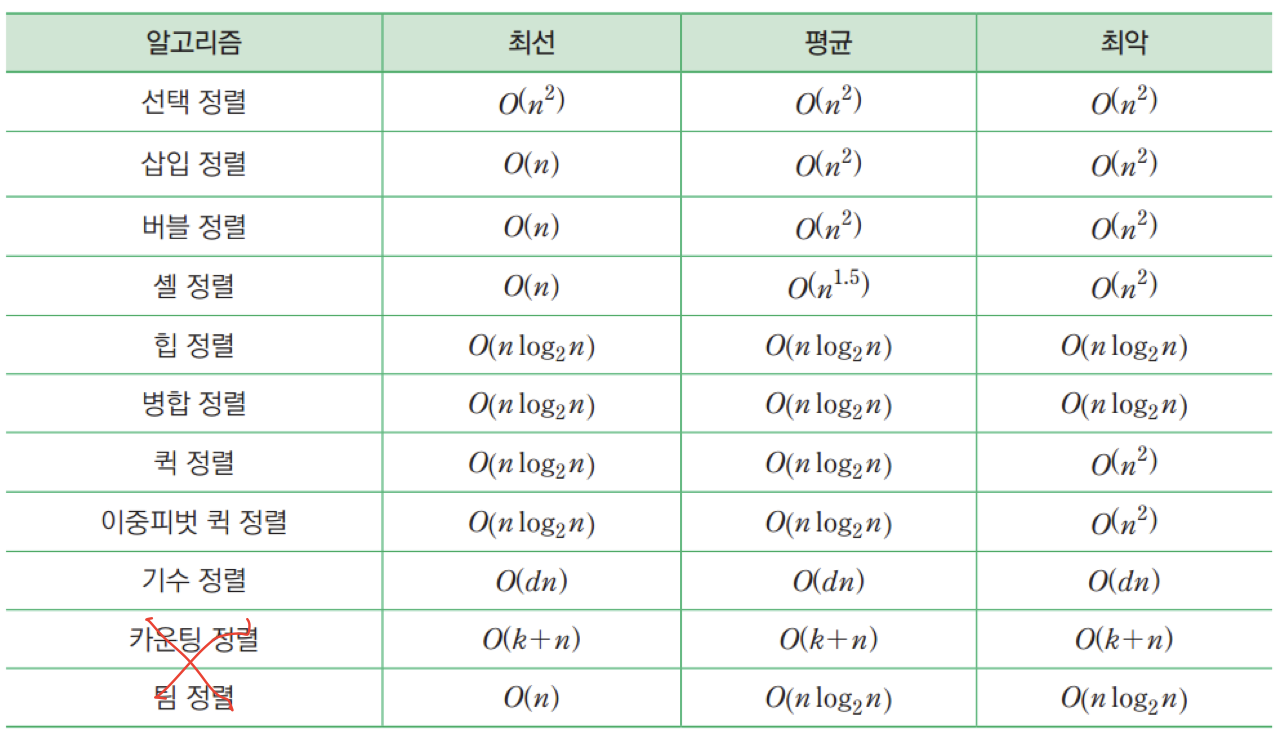